# BINARY CLASSIFICATION 

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

### DISCOVERING THE DATA SET

In [6]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
train_labels.shape

(25000,)

In [7]:
max([max(sequence) for sequence in train_data])

9999

### MAPPING INTEGER SEQUENCE TO THE CORRESPONDING SENTENCE

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 0us/step


In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### PREPARING THE DATA : ONE HOT ENCODING

In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences) , dimension))
    
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return(results)



In [16]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [19]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## BUILDING A NAIVE NEURAL NETWORK


In [39]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu' , input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [40]:
from keras import optimizers
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001) ,loss='binary_crossentropy' , metrics=[metrics.binary_accuracy])

### VALIDATION DATA

In [41]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### TRAINING 

In [42]:
history = model.fit(partial_x_train , partial_y_train ,epochs = 20, batch_size=512 , validation_data=(x_val , y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.5377 - binary_accuracy: 0.7774 - val_loss: 0.4050 - val_binary_accuracy: 0.8673
Epoch 2/20
15000/15000 [==============================] - 1s 61us/step - loss: 0.3144 - binary_accuracy: 0.9010 - val_loss: 0.3222 - val_binary_accuracy: 0.8775
Epoch 3/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.2298 - binary_accuracy: 0.9270 - val_loss: 0.2793 - val_binary_accuracy: 0.8911
Epoch 4/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.1772 - binary_accuracy: 0.9433 - val_loss: 0.2744 - val_binary_accuracy: 0.8890
Epoch 5/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.1423 - binary_accuracy: 0.9558 - val_loss: 0.2889 - val_binary_accuracy: 0.8851
Epoch 6/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.1192 - binary_accuracy: 0.9647 - val_loss: 0.3103 - val_binary_a

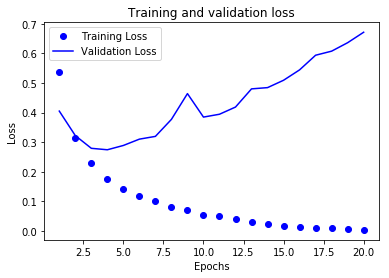

In [43]:
##PLOT THE HISTORY OF THE TRAINING
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['binary_accuracy']) + 1)

plt.plot(epochs, loss_values , 'bo' , label='Training Loss')
plt.plot(epochs, val_loss_values , 'b' , label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### We can see that w overfit at the 4th epoch, so we will stop to train after 4 epochs

In [44]:
#Training from scratch for 4 epochs
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

#Evaluation on test
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.4356 - acc: 0.8159
Epoch 2/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.2528 - acc: 0.9080
Epoch 3/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.1939 - acc: 0.9302
Epoch 4/4
25000/25000 [==============================] - 1s 35us/step


In [46]:
print('Accuracy is ' , results[1])

Accuracy is  0.88196


### PREDICTIONS

In [48]:
#PREDICTIONS ON TEST

y_pred = model.predict(x_test)

### TRYING VARIOUS IMPLEMENTATIONS

In [50]:
#One hidden layer
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

#Evaluation on test
results = model.evaluate(x_test, y_test)
print('Accuracy is ' , results[1])

Epoch 1/4
25000/25000 [==============================] - 1s 54us/step - loss: 0.4552 - acc: 0.8235
Epoch 2/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.2791 - acc: 0.9054
Epoch 3/4
25000/25000 [==============================] - 1s 52us/step - loss: 0.2207 - acc: 0.9251
Epoch 4/4
25000/25000 [==============================] - 1s 32us/step


In [52]:
#Three hidden layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

#Evaluation on test
results = model.evaluate(x_test, y_test)
print('Accuracy is ' , results[1])

Epoch 1/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.4549 - acc: 0.8194
Epoch 2/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.2532 - acc: 0.9087
Epoch 3/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.1918 - acc: 0.9309
Epoch 4/4
25000/25000 [==============================] - 1s 33us/step
Accuracy is  0.8808


In [55]:
#Two hidden layers with 64 units
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

#Evaluation on test
results = model.evaluate(x_test, y_test)
print('Accuracy is ' , results[1])

Epoch 1/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.4251 - acc: 0.8097
Epoch 2/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.2347 - acc: 0.9108
Epoch 3/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.1726 - acc: 0.9364
Epoch 4/4
25000/25000 [==============================] - 1s 43us/step
Accuracy is  0.8756


In [56]:
#Two hidden layers with 32 units
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

#Evaluation on test
results = model.evaluate(x_test, y_test)
print('Accuracy is ' , results[1])

Epoch 1/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.4279 - acc: 0.8143
Epoch 2/4
25000/25000 [==============================] - 1s 58us/step - loss: 0.2443 - acc: 0.9115
Epoch 3/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.1932 - acc: 0.9286
Epoch 4/4
25000/25000 [==============================] - 1s 46us/step
Accuracy is  0.88076


In [54]:
#Two hidden layers with MSE LOSS FUNCTION
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

#Evaluation on test
results = model.evaluate(x_test, y_test)
print('Accuracy is ' , results[1])

Epoch 1/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.1458 - acc: 0.8251
Epoch 2/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.0771 - acc: 0.9107
Epoch 3/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.0576 - acc: 0.9320
Epoch 4/4
25000/25000 [==============================] - 1s 32us/step
Accuracy is  0.87992


In [57]:
#Two hidden layers  with TANH
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

#Evaluation on test
results = model.evaluate(x_test, y_test)
print('Accuracy is ' , results[1])

Epoch 1/4
25000/25000 [==============================] - 2s 60us/step - loss: 0.4433 - acc: 0.8310
Epoch 2/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.2468 - acc: 0.9126
Epoch 3/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.1839 - acc: 0.9340
Epoch 4/4
25000/25000 [==============================] - 1s 32us/step
Accuracy is  0.8782


# MULTI CLASSIFICATION

In [58]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


## DISCOVERING THE DATA

In [59]:
print(len(train_data))
print(len(test_data))

8982
2246


In [63]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [60]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 1us/step


In [64]:
print (decoded_review)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


## PREPARING THE DATA

## One hot enconding of the data

In [65]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## One hot enconding of the labels

In [66]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results



In [68]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

print(one_hot_train_labels)
print(one_hot_test_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


On peut aussi faire avec keras.to_categorical

## BUILDING NEURAL NETWORK

In [71]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

### VALIDATION DATA

In [72]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [73]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 128us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 68us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 68us/step - loss: 1.0487 - acc: 0.7699 - val_loss: 1.1181 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 68us/step - loss: 0.8246 - acc: 0.8282 - val_loss: 1.0217 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 76us/step - loss: 0.6599 - acc: 0.8637 - val_loss: 0.9688 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 69us/step - loss: 0.5254 - acc: 0.8931 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 69us/step - loss: 0.4291 - acc: 0.9118 - val_loss: 0.9108 - val_acc: 0.8030
Epoch 

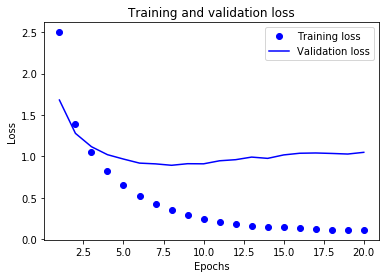

In [74]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

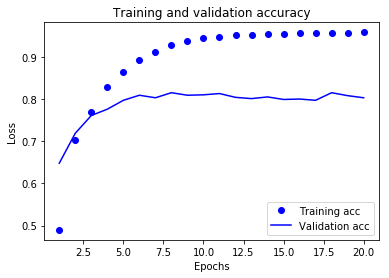

In [75]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### TRAINING A MODEL FROM SCRATCH

In [76]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 171us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 70us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 70us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 70us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 70us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 77us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 70us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8/9
798

In [77]:
print('Accuracy is', results[1])

Accuracy is 0.7756010686194165


### Different way ot handle the data (withotut hot enconding of the label)

In [100]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])
model.fit(x_train,
y_train,
epochs=20,
batch_size=128)

Epoch 1/20
8982/8982 [==============================] - 1s 143us/step - loss: 1.7404 - acc: 0.6335
Epoch 2/20
8982/8982 [==============================] - 1s 76us/step - loss: 0.9350 - acc: 0.7989
Epoch 3/20
8982/8982 [==============================] - 1s 78us/step - loss: 0.6236 - acc: 0.8684
Epoch 4/20
8982/8982 [==============================] - 1s 78us/step - loss: 0.4332 - acc: 0.9081
Epoch 5/20
8982/8982 [==============================] - 1s 77us/step - loss: 0.3172 - acc: 0.9300
Epoch 6/20
8982/8982 [==============================] - 1s 78us/step - loss: 0.2494 - acc: 0.9412
Epoch 7/20
8982/8982 [==============================] - 1s 77us/step - loss: 0.2130 - acc: 0.9483
Epoch 8/20
8982/8982 [==============================] - 1s 78us/step - loss: 0.1832 - acc: 0.9510
Epoch 9/20
8982/8982 [==============================] - 1s 78us/step - loss: 0.1652 - acc: 0.9529
Epoch 10/20
8982/8982 [==============================] - 1s 79us/step - loss: 0.1613 - acc: 0.9530
Epoch 11/20
8982/8

In [102]:
results =  model.evaluate(x_test, y_test)
print('Accuracy is', results[1])

2246/2246 [==============================] - 0s 140us/step
Accuracy is 0.789848619715401


### VARIOUS PARAMATERS

In [105]:
#NN with 4 hidden
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(results[1])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 155us/step - loss: 3.2927 - acc: 0.2180 - val_loss: 2.8711 - val_acc: 0.2320
Epoch 2/20
7982/7982 [==============================] - 1s 81us/step - loss: 2.4604 - acc: 0.3001 - val_loss: 2.0634 - val_acc: 0.5420
Epoch 3/20
7982/7982 [==============================] - 1s 82us/step - loss: 1.6104 - acc: 0.5965 - val_loss: 1.5190 - val_acc: 0.6290
Epoch 4/20
7982/7982 [==============================] - 1s 83us/step - loss: 1.2708 - acc: 0.6700 - val_loss: 1.3893 - val_acc: 0.6710
Epoch 5/20
7982/7982 [==============================] - 1s 83us/step - loss: 1.0945 - acc: 0.7348 - val_loss: 1.3225 - val_acc: 0.7090
Epoch 6/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.9664 - acc: 0.7685 - val_loss: 1.2741 - val_acc: 0.7230
Epoch 7/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.8679 - acc: 0.7875 - val_loss: 1.2712 - val_acc: 0.7260
Epoch 

In [108]:
#NN with 128 hidden
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(results[1])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 225us/step - loss: 1.6194 - acc: 0.6619 - val_loss: 1.0987 - val_acc: 0.7720
Epoch 2/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.7687 - acc: 0.8361 - val_loss: 0.8835 - val_acc: 0.8060
Epoch 3/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.4591 - acc: 0.9008 - val_loss: 0.9174 - val_acc: 0.8110
Epoch 4/20
7982/7982 [==============================] - 1s 145us/step - loss: 0.3082 - acc: 0.9298 - val_loss: 0.8450 - val_acc: 0.8220
Epoch 5/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.2327 - acc: 0.9444 - val_loss: 0.9750 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.1900 - acc: 0.9504 - val_loss: 0.9236 - val_acc: 0.8240
Epoch 7/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.1703 - acc: 0.9531 - val_loss: 1.1079 - val_acc: 0.7670


In [109]:
#NN with 128 hidden
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(results[1])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 142us/step - loss: 2.2729 - acc: 0.5340 - val_loss: 1.5473 - val_acc: 0.6530
Epoch 2/20
7982/7982 [==============================] - 0s 56us/step - loss: 1.2566 - acc: 0.7281 - val_loss: 1.2220 - val_acc: 0.7370
Epoch 3/20
7982/7982 [==============================] - 0s 62us/step - loss: 0.9416 - acc: 0.7983 - val_loss: 1.0808 - val_acc: 0.7740
Epoch 4/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.7337 - acc: 0.8408 - val_loss: 1.0771 - val_acc: 0.7520
Epoch 5/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.5758 - acc: 0.8725 - val_loss: 0.9939 - val_acc: 0.7910
Epoch 6/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.4520 - acc: 0.8996 - val_loss: 0.9645 - val_acc: 0.8060
Epoch 7/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.3548 - acc: 0.9212 - val_loss: 0.9455 - val_acc: 0.8150
Epoch 

In [110]:
#NN with 1 hidden layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(results[1])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 178us/step - loss: 1.8416 - acc: 0.6443 - val_loss: 1.2073 - val_acc: 0.7410
Epoch 2/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.9336 - acc: 0.8066 - val_loss: 0.9663 - val_acc: 0.8040
Epoch 3/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.6369 - acc: 0.8703 - val_loss: 0.8537 - val_acc: 0.8210
Epoch 4/20
7982/7982 [==============================] - 1s 86us/step - loss: 0.4545 - acc: 0.9054 - val_loss: 0.8045 - val_acc: 0.8350
Epoch 5/20
7982/7982 [==============================] - 1s 86us/step - loss: 0.3392 - acc: 0.9266 - val_loss: 0.7949 - val_acc: 0.8370
Epoch 6/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.2651 - acc: 0.9401 - val_loss: 0.8157 - val_acc: 0.8250
Epoch 7/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.2178 - acc: 0.9466 - val_loss: 0.8250 - val_acc: 0.8270
Epoch 

In [111]:
#NN with 3 hidden layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(results[1])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 185us/step - loss: 1.9002 - acc: 0.6118 - val_loss: 1.2715 - val_acc: 0.7230
Epoch 2/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.9874 - acc: 0.7783 - val_loss: 1.0645 - val_acc: 0.7640
Epoch 3/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.6712 - acc: 0.8513 - val_loss: 1.0057 - val_acc: 0.7790
Epoch 4/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.4721 - acc: 0.8983 - val_loss: 0.9443 - val_acc: 0.8150
Epoch 5/20
7982/7982 [==============================] - 1s 96us/step - loss: 0.3415 - acc: 0.9216 - val_loss: 0.9810 - val_acc: 0.8110
Epoch 6/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.2725 - acc: 0.9385 - val_loss: 1.0810 - val_acc: 0.7990
Epoch 7/20
7982/7982 [==============================] - 1s 86us/step - loss: 0.2190 - acc: 0.9489 - val_loss: 1.1847 - val_acc: 0.7810
Epoch 